# Clash of Clans - Explatory Data Analysis

Let's start with importing libraries and see what the data will take us! First, explore the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('coc_clans_dataset.csv/coc_clans_dataset.csv', index_col = 0)

### I try to recognize which columns I will use and which colums are unnecessary for me.

In [3]:
df.head()

,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,clan_versus_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,5213,...,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,1019,...,Unranked,1,0,0,1,0,0,Unranked,90,1752
#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,670,...,Unranked,2,0,0,1,0,0,Unranked,30,733
#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,457,...,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,399,...,Unranked,2,0,0,1,0,0,Unranked,23,674


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3559743 entries, #UQVQRJQ0 to #2YRU29GGL
Data columns (total 26 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   clan_name                       object
 1   clan_type                       object
 2   clan_description                object
 3   clan_location                   object
 4   isFamilyFriendly                bool  
 5   clan_badge_url                  object
 6   clan_level                      int64 
 7   clan_points                     int64 
 8   clan_builder_base_points        int64 
 9   clan_versus_points              int64 
 10  required_trophies               int64 
 11  war_frequency                   object
 12  war_win_streak                  int64 
 13  war_wins                        int64 
 14  war_ties                        int64 
 15  war_losses                      int64 
 16  clan_war_league                 object
 17  num_members                     int64 
 

#### I like to use visualizations, pretty much for everything :) Let's see how many null data we have.


<AxesSubplot:ylabel='clan_tag'>

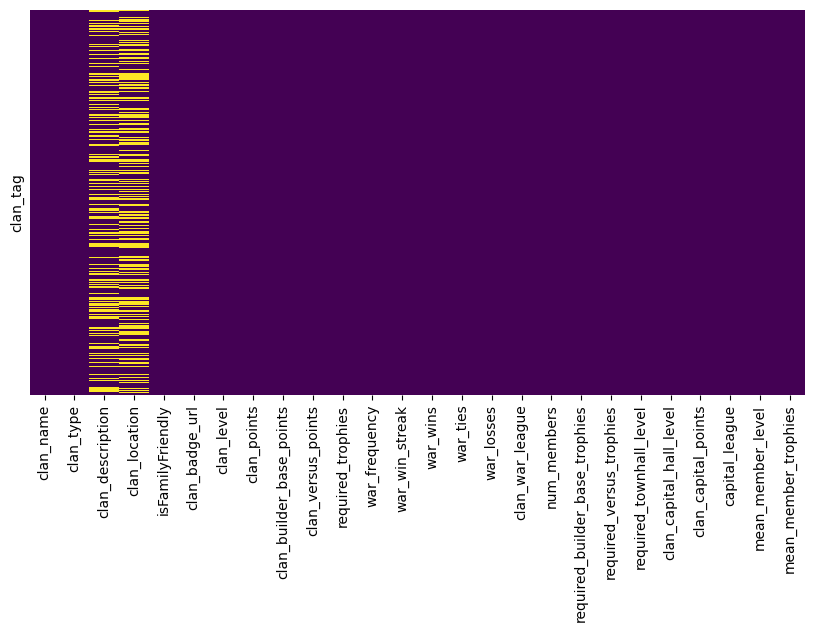

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

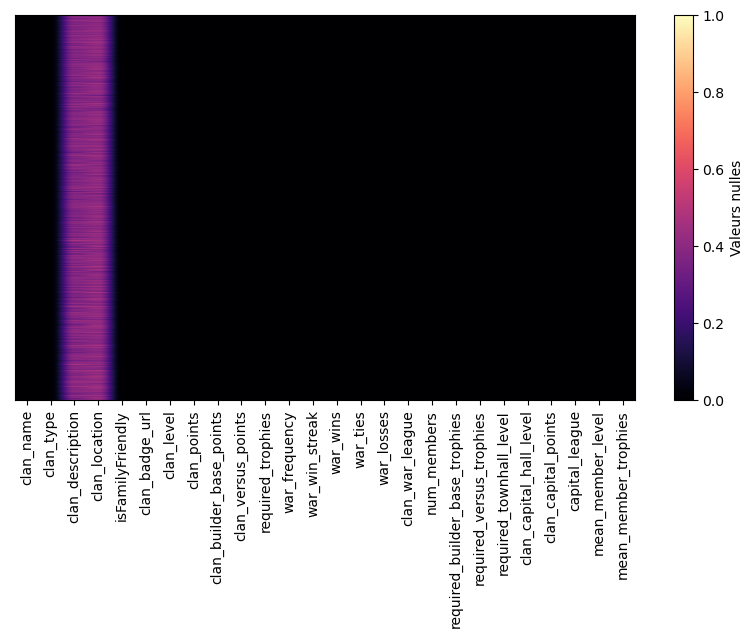

In [6]:
# Créez une figure Matplotlib avec la taille spécifiée
plt.figure(figsize=(10, 5))

# Créez un tableau de booléens indiquant les valeurs nulles
null_matrix = df.isnull().values

# Utilisez imshow() pour afficher le tableau de booléens
plt.imshow(null_matrix, cmap='magma', aspect='auto')

# Désactivez les étiquettes de l'axe Y
plt.yticks([])

# Définissez les étiquettes de l'axe X avec les noms de colonnes
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90)  # Rotation facultative

plt.colorbar().set_label("Valeurs nulles")

# Affichez le graphique
plt.show()


#### Data is clearly processed, we have only two columns with missing data.

## Let's explore one of those columns with empty cells, "clan_location".
## I want to see how many empty cells we have, after that explore its distribution.


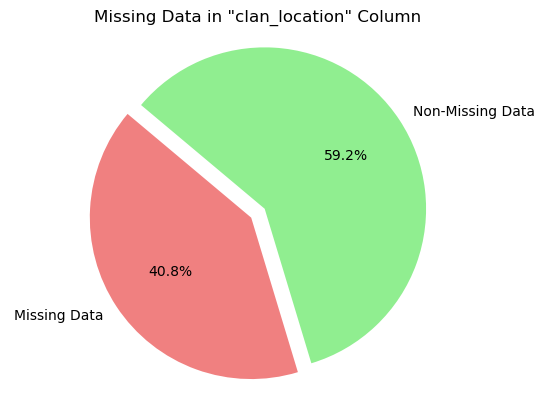

In [7]:
missing_count = df['clan_location'].isnull().sum()

non_missing_count = len(df) - missing_count

labels = ['Missing Data', 'Non-Missing Data']
sizes = [missing_count, non_missing_count]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # Explode the "Missing Data" slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Missing Data in "clan_location" Column')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

In [8]:
df['clan_location'].unique(), df['clan_location'].value_counts()

(array(['International', 'Indonesia', 'Pakistan', nan, 'Türkiye',
        'Bahamas', 'Chile', 'Brazil', 'Philippines', 'Italy', 'Canada',
        'Mexico', 'Malaysia', 'India', 'Afghanistan', 'United States',
        'Iran', 'Germany', 'Uruguay', 'American Samoa', 'Thailand',
        'Vietnam', 'Greenland', 'Latvia', 'South Africa', 'Albania',
        'Japan', 'Hungary', 'Bangladesh', 'Norway', 'France',
        'Myanmar (Burma)', 'Kuwait', 'Australia', 'Bosnia and Herzegovina',
        'Ecuador', 'Kazakhstan', 'North Korea', 'Saudi Arabia',
        'New Zealand', 'Jamaica', 'China', 'Hong Kong', 'Panama',
        'United Kingdom', 'Barbados', 'Netherlands', 'Belgium', 'Russia',
        'Fiji', 'Uzbekistan', 'Swaziland', 'Dominican Republic', 'Iraq',
        'Portugal', 'Egypt', 'Israel', 'Western Sahara', 'Ireland',
        'Côte d’Ivoire', 'Heard & McDonald Islands', 'Åland Islands',
        'Bolivia', 'Samoa', 'Honduras', 'French Polynesia', 'Azerbaijan',
        'Andorra', 'Algeria

In [9]:
count = (df['clan_location'] == 'Türkiye').sum()
count

68730

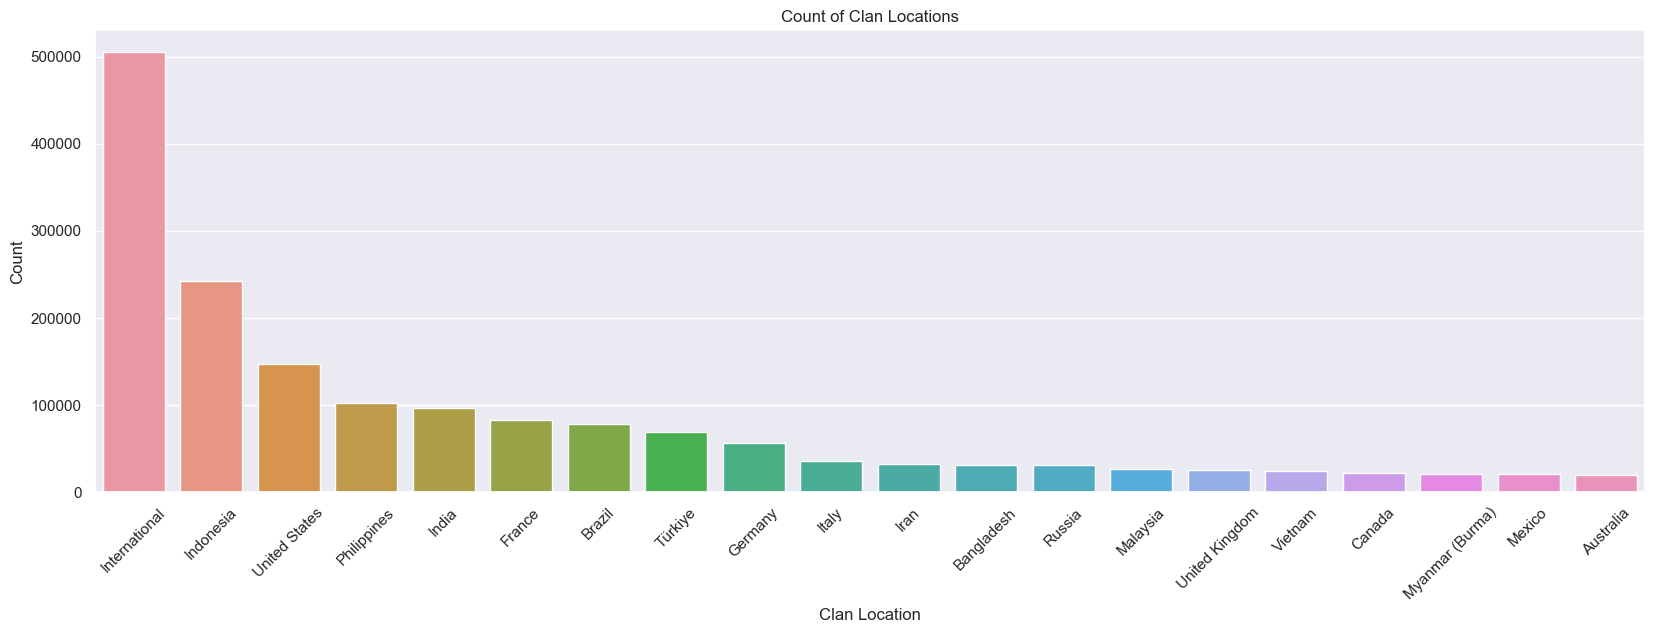

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

sns.countplot(data=df, x='clan_location', order=df['clan_location'].value_counts().head(20).index)
plt.xticks(rotation=45)  #for better readability
plt.title('Count of Clan Locations')
plt.xlabel('Clan Location')
plt.ylabel('Count')

plt.show()

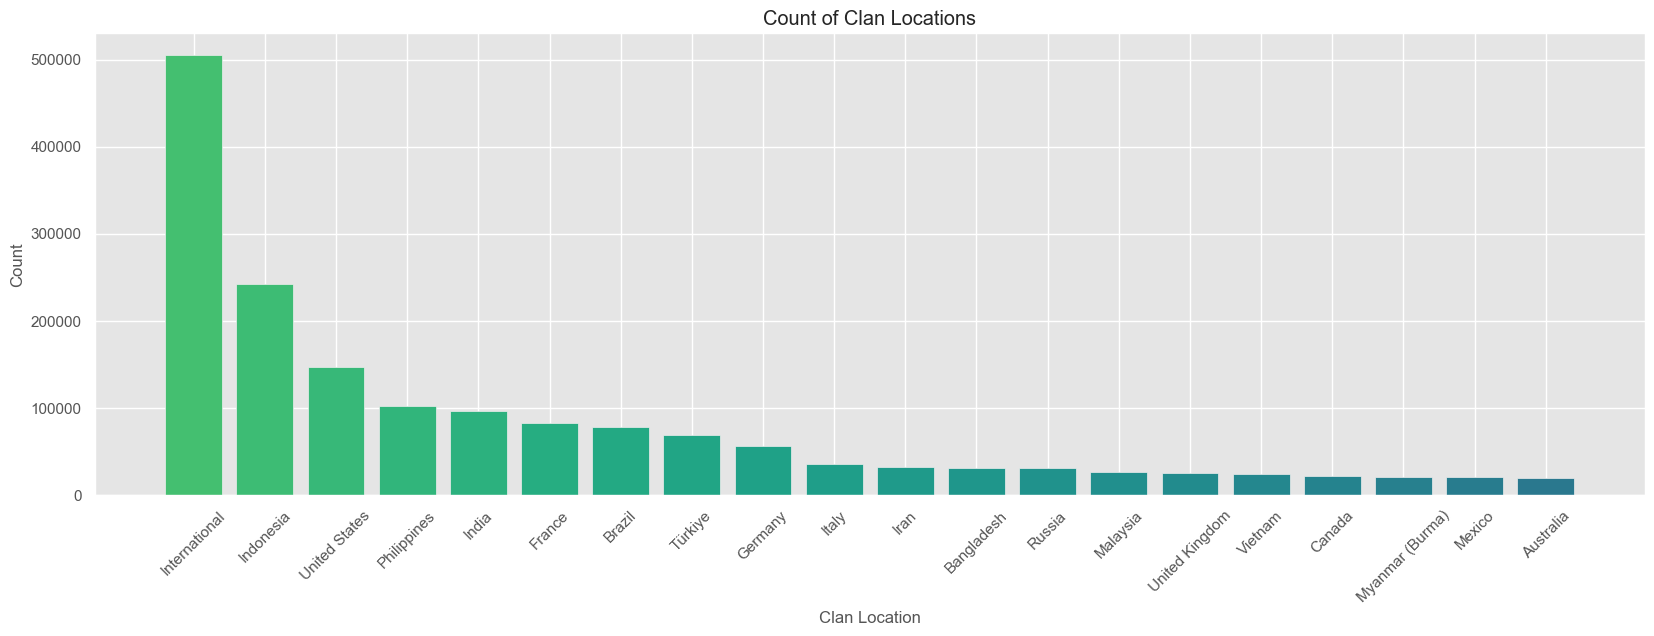

In [11]:
# Réglez le style du tracé
plt.style.use("ggplot")

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(20, 6))

# Créez le graphique de comptage
counts = df['clan_location'].value_counts().head(20)
locations = counts.index
colors = plt.cm.viridis(np.linspace(0.7, 0.4, len(locations)))

plt.bar(locations, counts, color = colors)
plt.xticks(rotation=45)

# Ajoutez un titre, des étiquettes d'axe et un libellé
plt.title('Count of Clan Locations')
plt.xlabel('Clan Location')
plt.ylabel('Count')

# Affichez le graphique
plt.show()

### Indonesians seem to love Clash of Clans :)

## This was a simple exploration for a column. Let's dive deep into remaining of the data.

### Is Family Friendly? Let's find out.

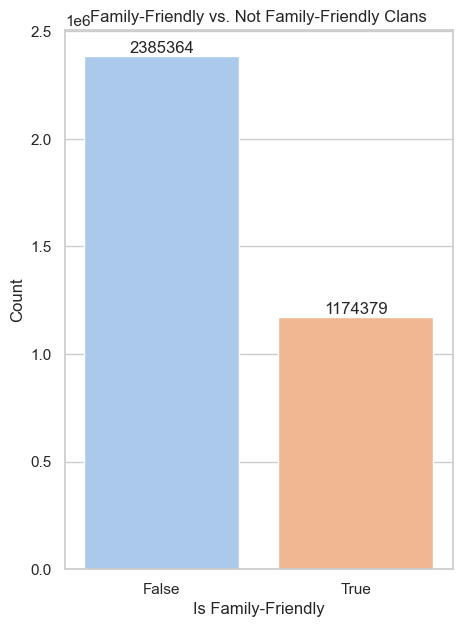

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 7))

sns.countplot(data=df, x='isFamilyFriendly', palette="pastel")

plt.title('Family-Friendly vs. Not Family-Friendly Clans')
plt.xlabel('Is Family-Friendly')
plt.ylabel('Count')

# Annotate the bars with counts
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

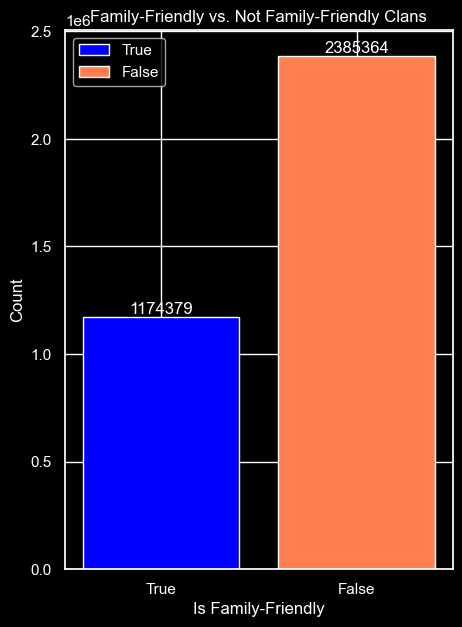

In [13]:
import matplotlib.pyplot as plt

# Réglez le style du tracé
plt.style.use("dark_background")

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(5, 7))

# Divisez les données en deux groupes (True et False)
true_data = df[df['isFamilyFriendly'] == True]
false_data = df[df['isFamilyFriendly'] == False]

# Créez le graphique de comptage avec des couleurs différentes pour chaque groupe
plt.bar('True', len(true_data), color='blue', label='True')
plt.bar('False', len(false_data), color='coral', label='False')

# Ajoutez un titre, des étiquettes d'axe et un libellé
plt.title('Family-Friendly vs. Not Family-Friendly Clans')
plt.xlabel('Is Family-Friendly')
plt.ylabel('Count')

# Annoter les barres avec les décomptes
ax = plt.gca()
for i, v in enumerate([len(true_data), len(false_data)]):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)
# Affichez la légende
plt.legend()

# Affichez le graphique
plt.show()


### When we look into the clan_level column, we see that most clans are just level 1 and the frequency decreases sharply. So even with the bins, visualization is not very pleasant, but I'll keep it either way :)

In [14]:
df['clan_level'].value_counts()

1     2452736
2      371010
3      191613
4      122426
5       83669
6       62030
7       47044
8       36859
9       32036
10      24932
11      19981
12      15919
14      14728
13      12963
15      11791
16       9317
17       8247
19       7421
18       6851
20       6067
21       5276
22       4427
23       3528
24       3067
25       2295
26       1463
27        906
28        524
29        298
30        160
31         75
32         39
33         29
34         13
35          2
36          1
Name: clan_level, dtype: int64

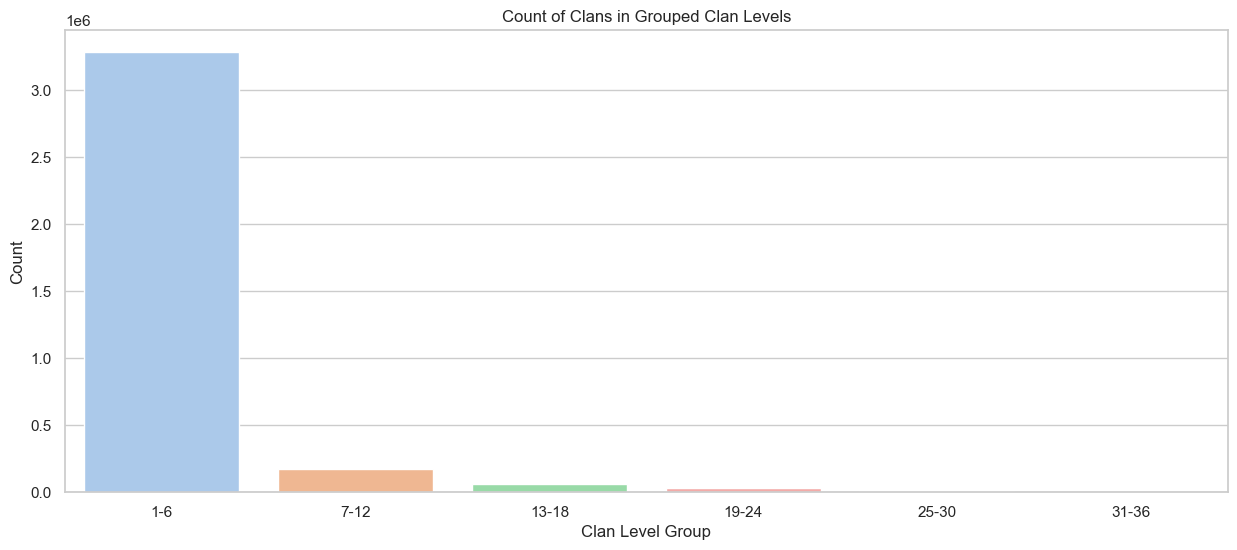

In [15]:
bins = [0, 6, 12, 18, 24, 30, 36]  # Group levels 1-6, 7-12, 13-18, and so on

# Group the clan levels and create a new column to represent the groups
df['clan_level_group'] = pd.cut(df['clan_level'], bins=bins, labels=['1-6', '7-12', '13-18', '19-24', '25-30', '31-36'])

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Create a countplot to visualize the grouped clan levels
sns.countplot(data=df, x='clan_level_group', palette="pastel", order=['1-6', '7-12', '13-18', '19-24', '25-30', '31-36'])

plt.title('Count of Clans in Grouped Clan Levels')
plt.xlabel('Clan Level Group')
plt.ylabel('Count')

plt.show()

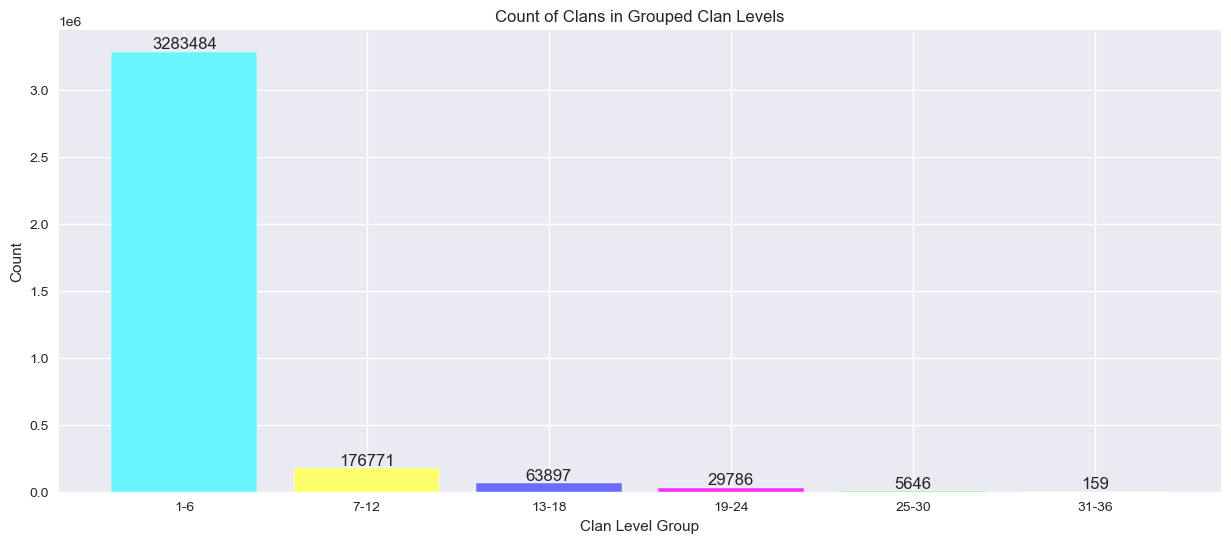

In [16]:
# Utilisez un style moderne de Matplotlib (style "seaborn")
plt.style.use("seaborn")

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(15, 6))

# Comptez les clans dans chaque groupe de niveau de clan
grouped_levels = ['1-6', '7-12', '13-18', '19-24', '25-30', '31-36']
counts = [len(df[df['clan_level_group'] == level]) for level in grouped_levels]

# Utilisez une palette de couleurs différente pour chaque barre
colors = [ "#6BF6FF", "#FFFF6B", "#6B6BFF","#FF2BFF", "#6BfF6B","#FF6B2B"]

# Créez un graphique de comptage avec des couleurs différentes
plt.bar(grouped_levels, counts, color=colors)

# Ajoutez un titre, des étiquettes d'axe et un libellé
plt.title('Count of Clans in Grouped Clan Levels')
plt.xlabel('Clan Level Group')
plt.ylabel('Count')

# Annoter les barres avec les décomptes
ax = plt.gca()
for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Affichez le graphique
plt.show()


#### Let's show something obvious:

<Figure size 1500x1500 with 0 Axes>

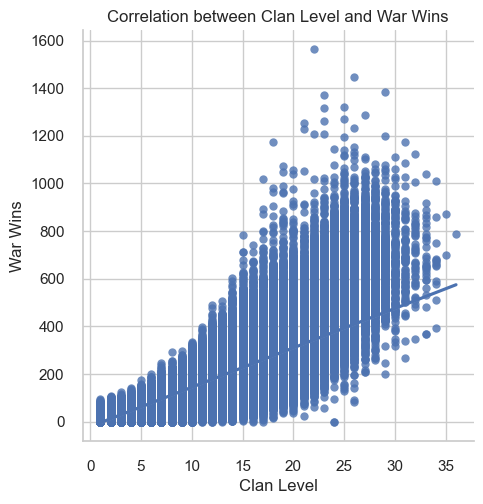

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.lmplot(data=df, x='clan_level', y='war_wins', palette="pastel")

plt.title('Correlation between Clan Level and War Wins')
plt.xlabel('Clan Level')
plt.ylabel('War Wins')

plt.show()

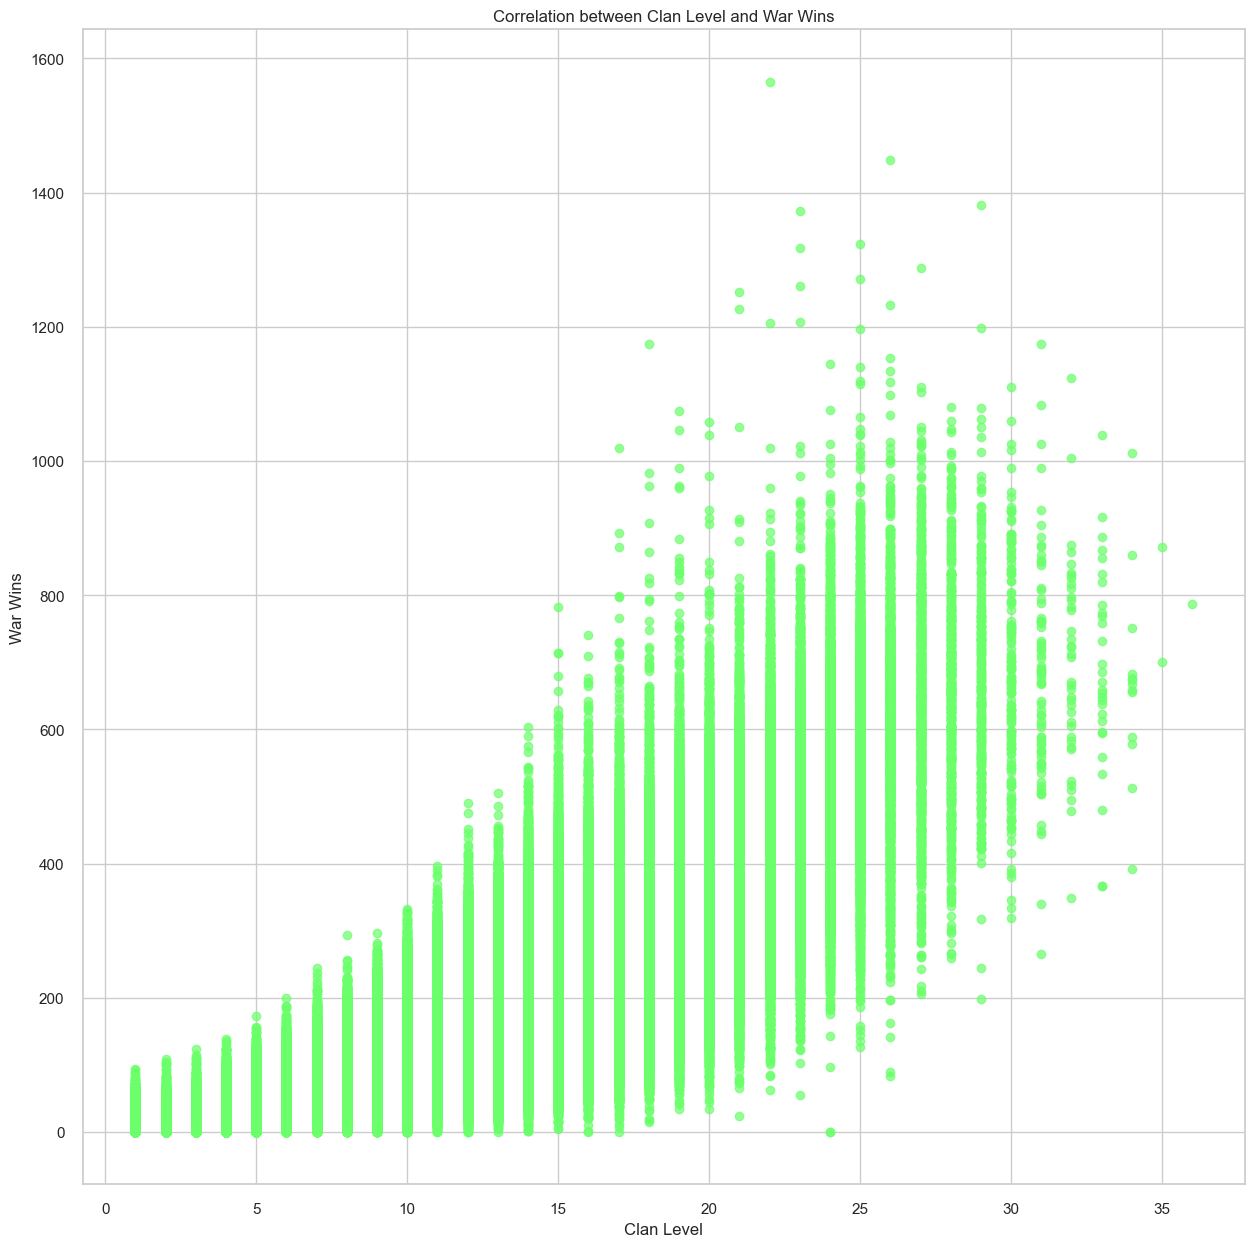

In [18]:
# Réglez le style du tracé
plt.style.use("seaborn-pastel")

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(15, 15))

# Créez un nuage de points (scatter plot) pour la corrélation entre le niveau du clan et les victoires en guerre
plt.scatter(df['clan_level'], df['war_wins'], c='#6BfF6B', alpha=0.7)

# Ajoutez un titre, des étiquettes d'axe et un libellé
plt.title('Correlation between Clan Level and War Wins')
plt.xlabel('Clan Level')
plt.ylabel('War Wins')

# Affichez le graphique
plt.show()


### This lmplot took some time to process, most probably because of the size of the data. 

## Distribution of Clan Leagues

In [19]:
df['capital_league'].value_counts()

Unranked               3386262
Bronze League III        23486
Bronze League II         20708
Bronze League I          16887
Silver League III        14662
Silver League II         13419
Silver League I          12484
Gold League III          11442
Gold League II           10251
Gold League I             9006
Crystal League III        7919
Crystal League II         6753
Crystal League I          5617
Master League III         4594
Master League II          3675
Champion League III       3480
Master League I           2932
Champion League II        2342
Champion League I         1582
Titan League III          1018
Titan League II            605
Titan League I             353
Legend League              266
Name: capital_league, dtype: int64

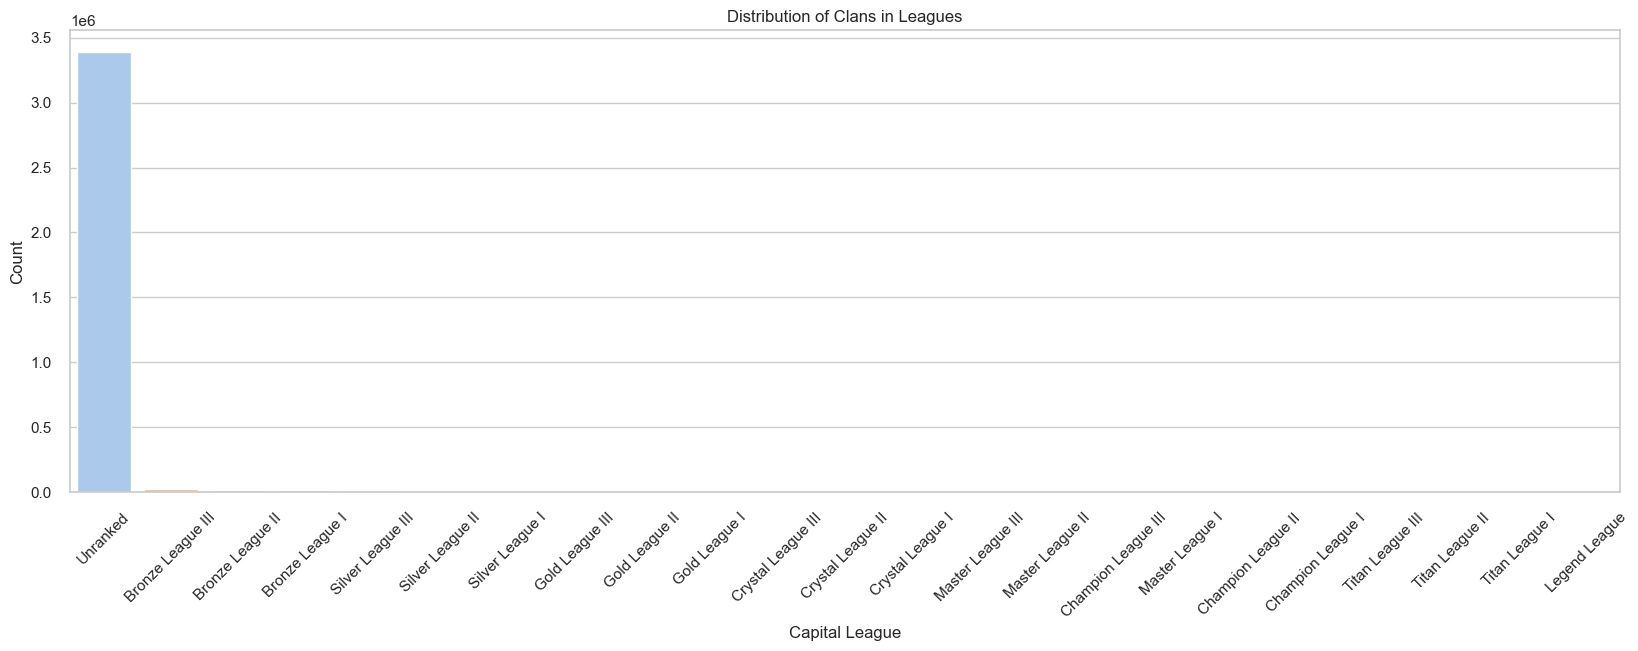

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

sns.countplot(data=df, x='capital_league', palette="pastel", order=df['capital_league'].value_counts().index)

plt.title('Distribution of Clans in Leagues')
plt.xlabel('Capital League')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

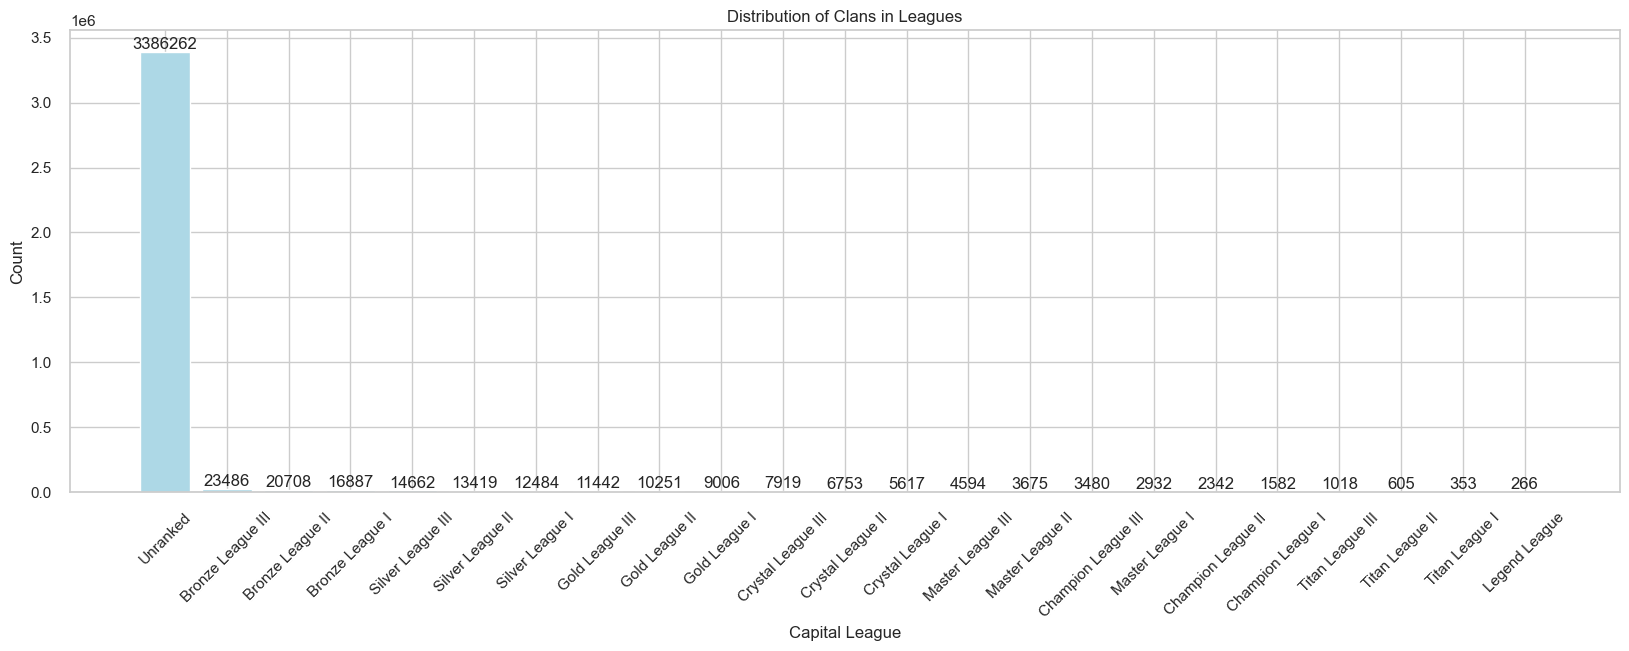

In [21]:
# Réglez le style du tracé
plt.style.use("seaborn-pastel")

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(20, 6))

# Comptez les clans dans chaque ligue de capital
league_counts = df['capital_league'].value_counts()

# Créez un graphique à barres avec une palette de couleurs "pastel"
plt.bar(league_counts.index, league_counts, color='lightblue')

# Ajoutez un titre, des étiquettes d'axe et un libellé
plt.title('Distribution of Clans in Leagues')
plt.xlabel('Capital League')
plt.ylabel('Count')

# Effectuez une rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Annoter les barres avec les décomptes
ax = plt.gca()
for i, v in enumerate(league_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Affichez le graphique
plt.show()


### So many unranked, just exclude it for the sake of the graph.

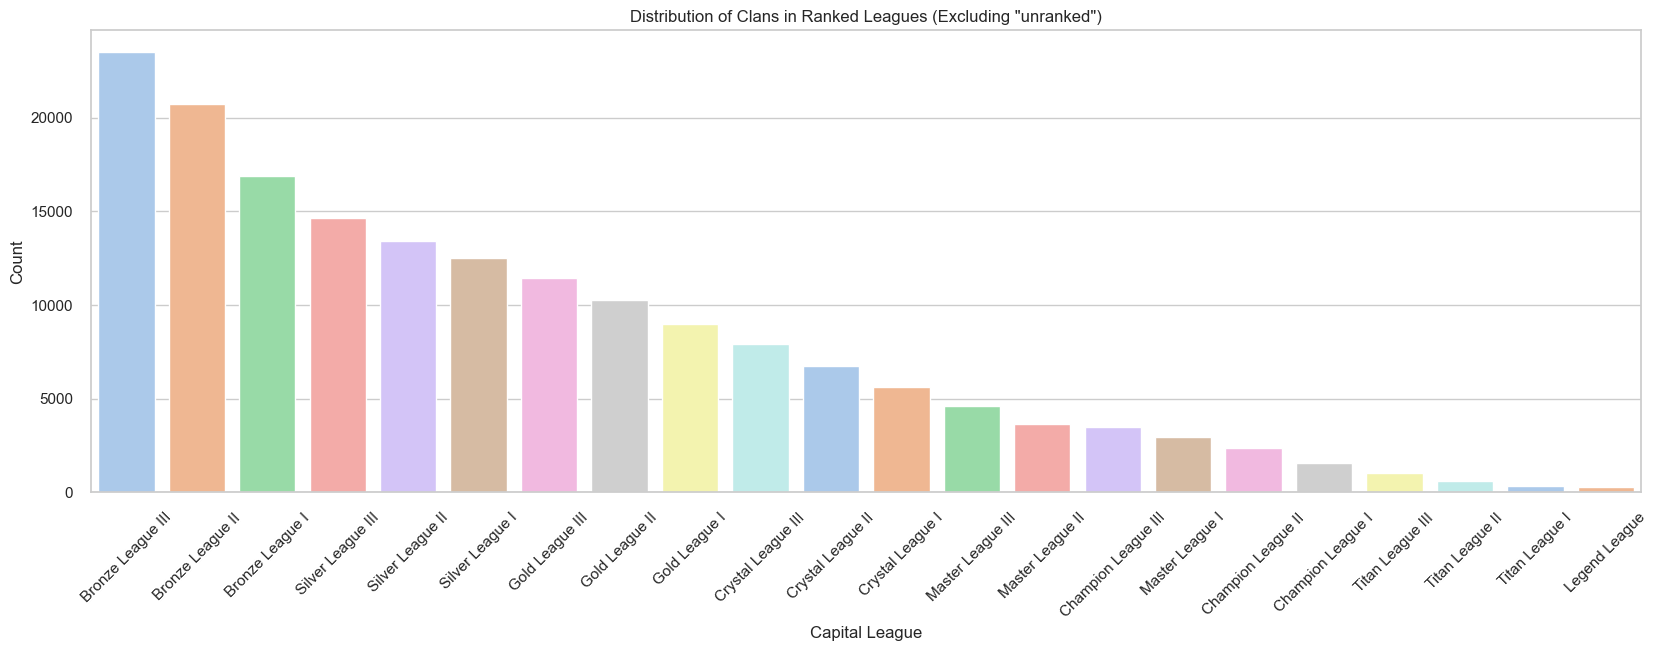

In [22]:
df_ranked = df[df['capital_league'] != 'Unranked']
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

sns.countplot(data=df_ranked, x='capital_league', palette="pastel", order=df_ranked['capital_league'].value_counts().index)

plt.title('Distribution of Clans in Ranked Leagues (Excluding "unranked")')
plt.xlabel('Capital League')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

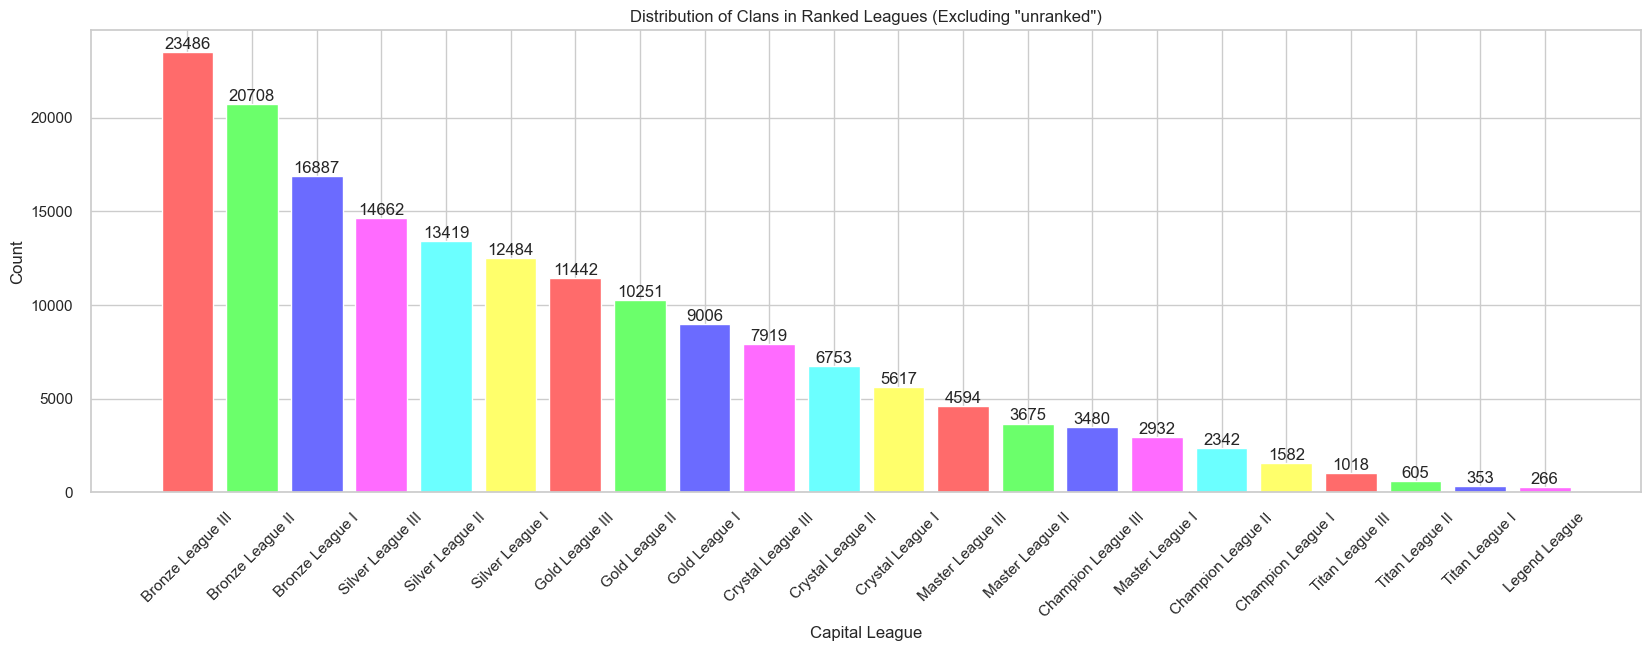

In [23]:
# Réglez le style du tracé
plt.style.use("seaborn-pastel")

# Filtrer les données pour exclure les clans non classés
df_ranked = df[df['capital_league'] != 'Unranked']

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(20, 6))

# Comptez les clans dans chaque ligue de capital classée
league_counts = df_ranked['capital_league'].value_counts()
league_labels = league_counts.index

# Définissez une palette de couleurs personnalisée pour les barres
colors = ["#FF6B6B", "#6BFF6B", "#6B6BFF", "#FF6BFF", "#6BFFFF", "#FFFF6B"]

# Créez un graphique à barres multicolores
plt.bar(league_labels, league_counts, color=colors)

# Ajoutez un titre, des étiquettes d'axe et un libellé
plt.title('Distribution of Clans in Ranked Leagues (Excluding "unranked")')
plt.xlabel('Capital League')
plt.ylabel('Count')

# Effectuez une rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Annoter les barres avec les décomptes
ax = plt.gca()
for i, v in enumerate(league_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Affichez le graphique
plt.show()


## Correlation Map

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3559743 entries, #UQVQRJQ0 to #2YRU29GGL
Data columns (total 27 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   clan_name                       object  
 1   clan_type                       object  
 2   clan_description                object  
 3   clan_location                   object  
 4   isFamilyFriendly                bool    
 5   clan_badge_url                  object  
 6   clan_level                      int64   
 7   clan_points                     int64   
 8   clan_builder_base_points        int64   
 9   clan_versus_points              int64   
 10  required_trophies               int64   
 11  war_frequency                   object  
 12  war_win_streak                  int64   
 13  war_wins                        int64   
 14  war_ties                        int64   
 15  war_losses                      int64   
 16  clan_war_league                 object  
 17  nu

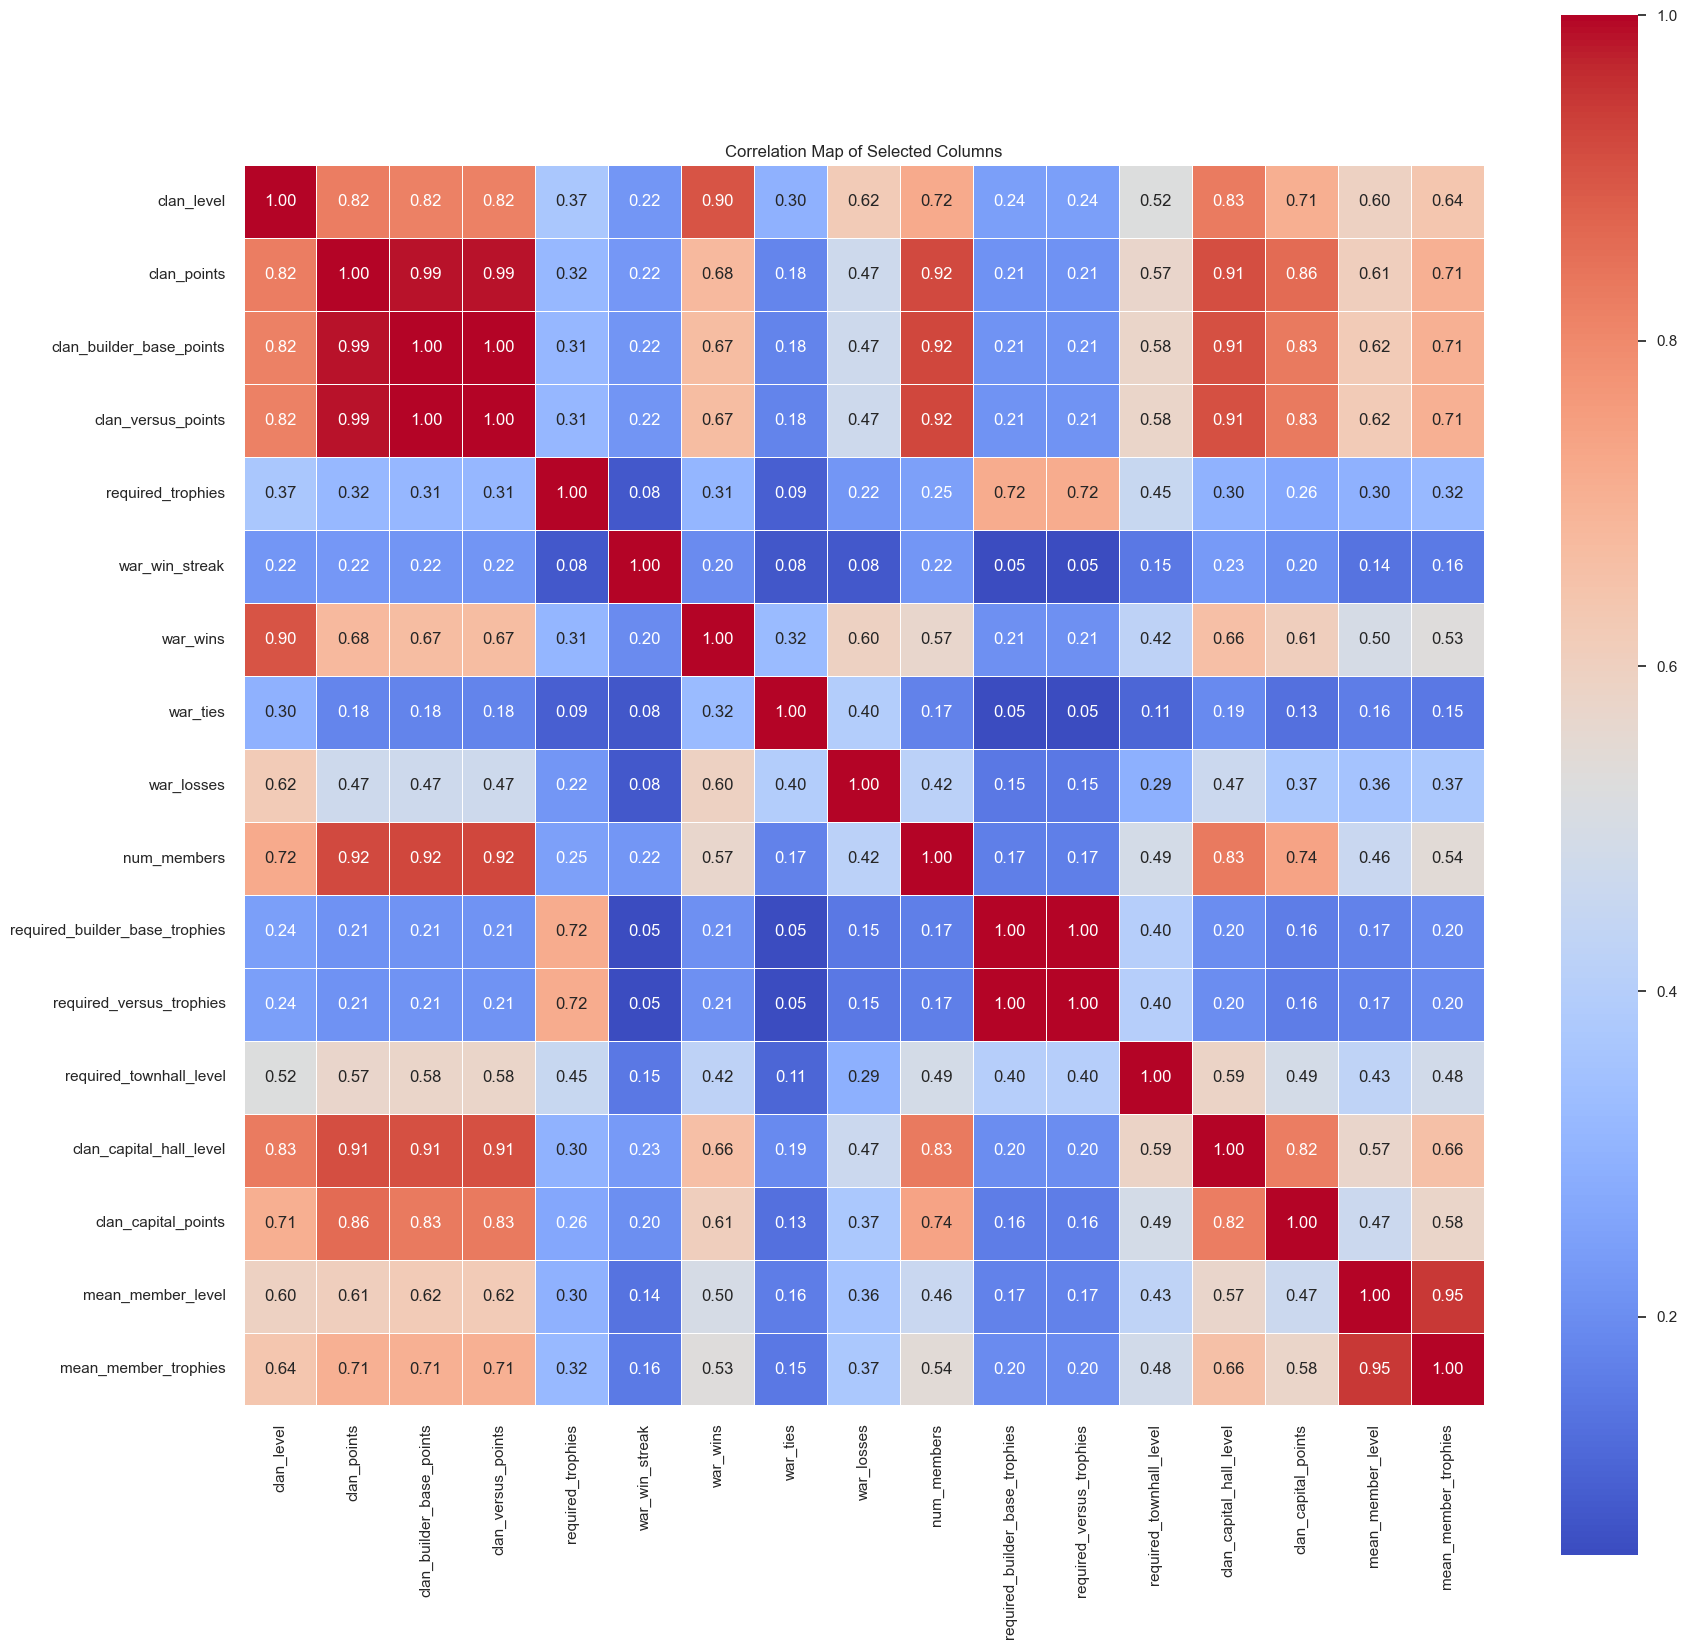

In [25]:
selected_columns = ['clan_level', 'clan_points', 'clan_builder_base_points', 'clan_versus_points',
                    'required_trophies', 'war_win_streak', 'war_wins', 'war_ties', 'war_losses',
                    'num_members', 'required_builder_base_trophies','required_versus_trophies', 
                    'required_townhall_level', 'clan_capital_hall_level','clan_capital_points', 
                    'mean_member_level', 'mean_member_trophies',
                    ]

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(20, 20))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

plt.title('Correlation Map of Selected Columns')
plt.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_13316\2248116182.py:34: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


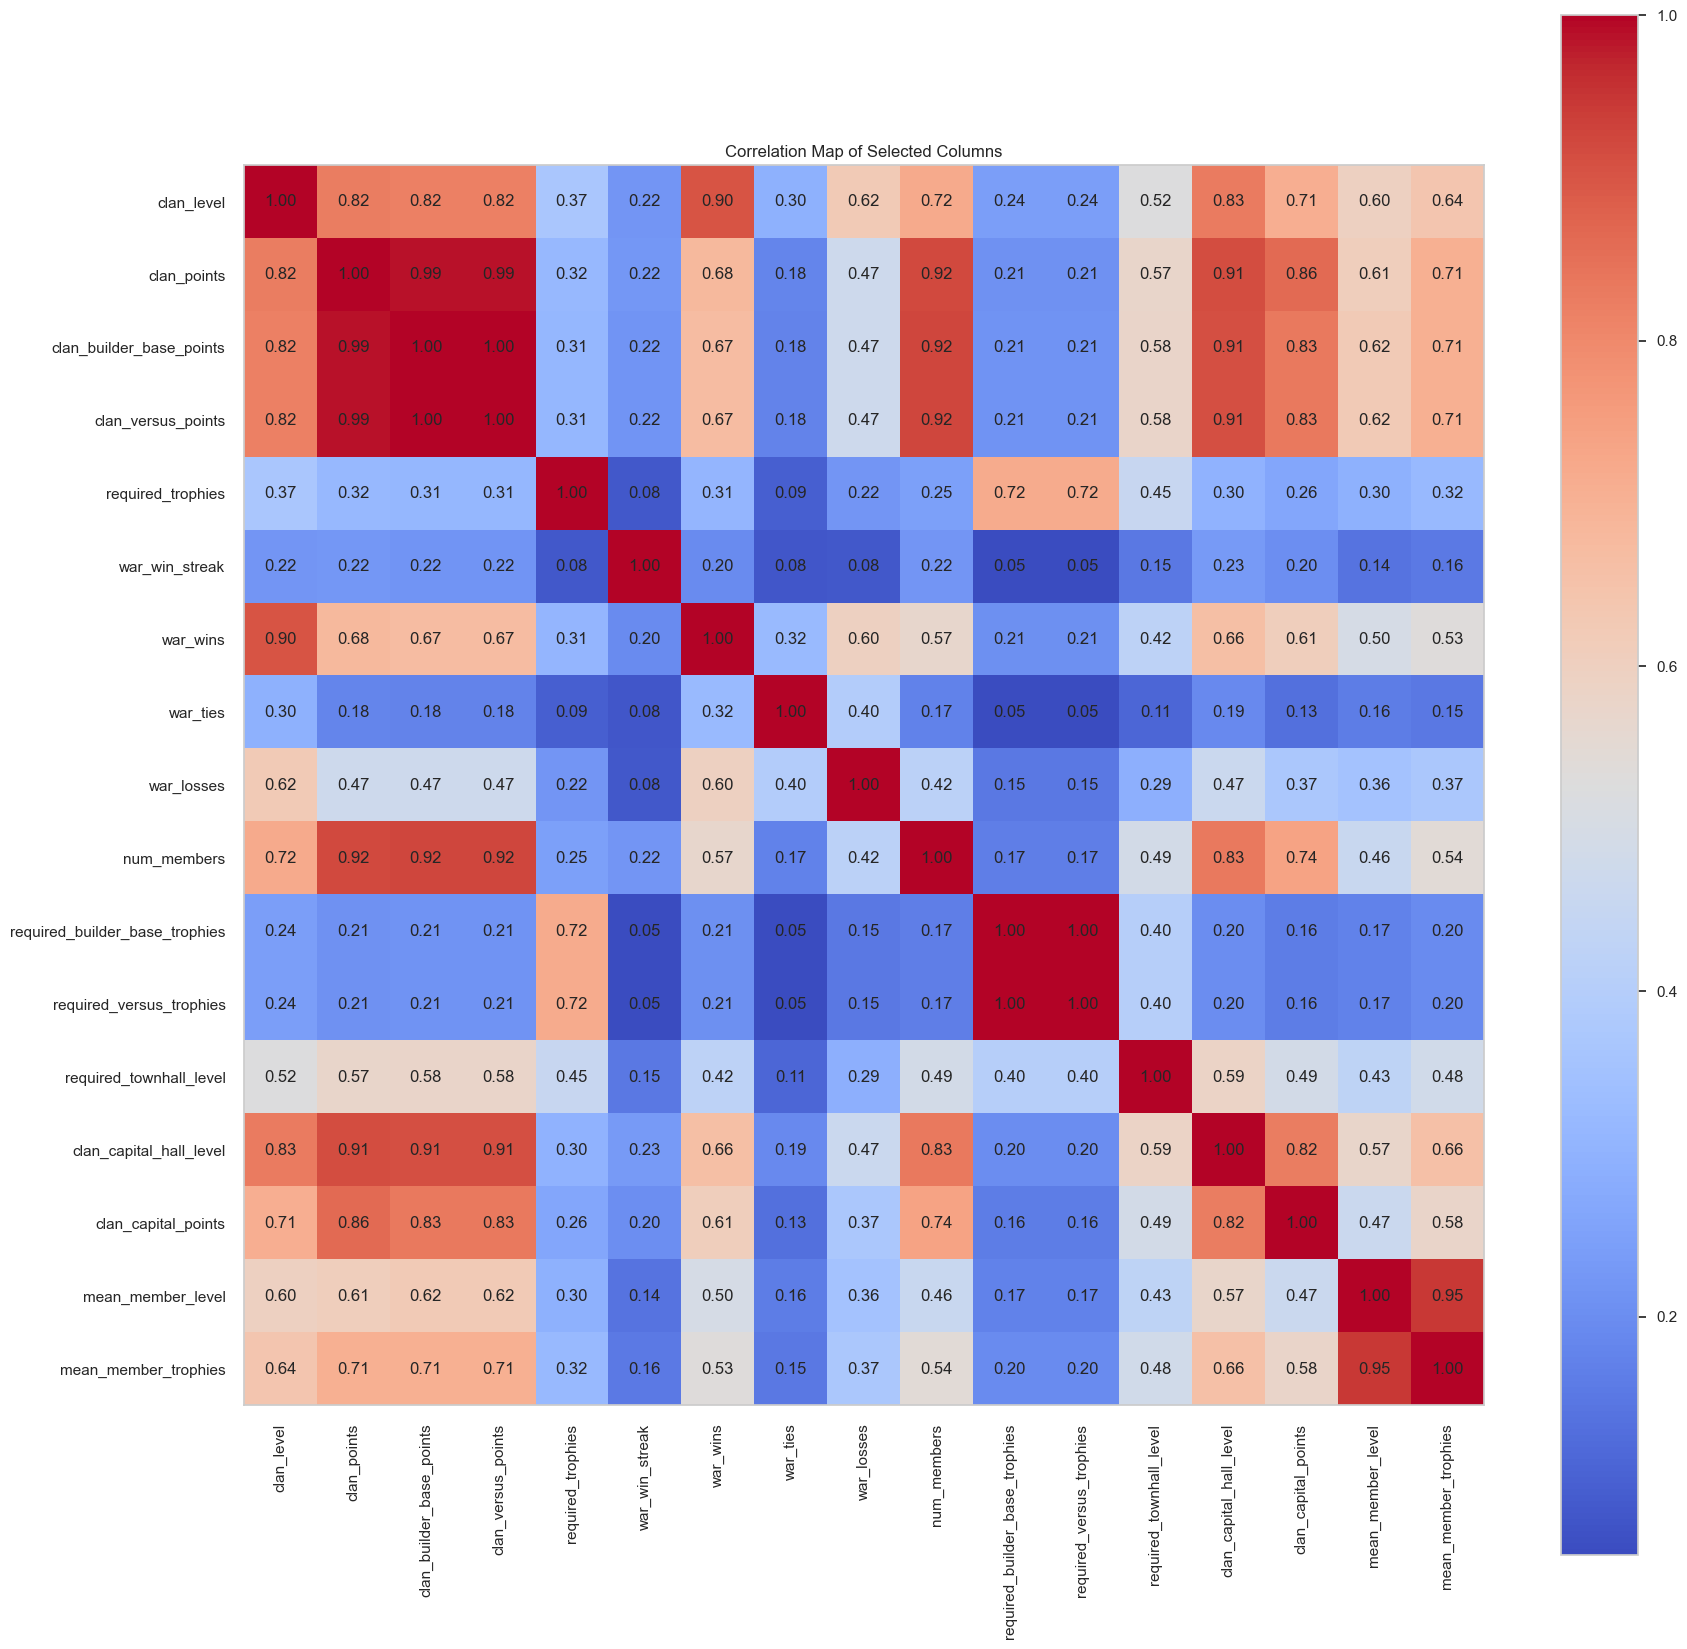

In [27]:
# Sélectionnez les colonnes que vous souhaitez inclure dans la matrice de corrélation
selected_columns = ['clan_level', 'clan_points', 'clan_builder_base_points', 'clan_versus_points',
                    'required_trophies', 'war_win_streak', 'war_wins', 'war_ties', 'war_losses',
                    'num_members', 'required_builder_base_trophies', 'required_versus_trophies', 
                    'required_townhall_level', 'clan_capital_hall_level', 'clan_capital_points', 
                    'mean_member_level', 'mean_member_trophies']

# Calculez la matrice de corrélation
correlation_matrix = df[selected_columns].corr()

# Créez une figure avec la taille spécifiée
plt.figure(figsize=(20, 20))

# Créez une carte de chaleur en utilisant plt.imshow()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Ajoutez des annotations pour afficher les valeurs de corrélation
n = len(selected_columns)
for i in range(n):
    for j in range(n):
        plt.text(i, j, format(correlation_matrix.iloc[i, j], ".2f"), ha='center', va='center')

# Définissez les étiquettes d'axe
plt.xticks(np.arange(n), selected_columns, rotation=90)
plt.yticks(np.arange(n), selected_columns)

# Ajoutez un titre
plt.title('Correlation Map of Selected Columns')

# Supprimez les grilles avant d'ajouter la barre de couleur
plt.grid(False)

# Ajoutez la barre de couleur
plt.colorbar()

# Affichez la carte de corrélation
plt.show()


## It would be interesting to run ML models in this dataset. We need to first identify target and variables. EDA is needed before "model step".